# Big Data - Team Assignment 2 (Project Team 27)



## Spark Use Case 1 - Query train wreck accidents based on keywords such as Bicycle, Pedestrian, and so on
Analyze train wrecks based on accident reports for the year *2017*. Our analysis shows how the train wreck database can be used to learn more about the causes for these accidents.

This notebook runs on Python 3.5 with Spark


### Table of contents
- [Data Set](#dataSet)
- [Load data](#load_data)
- [Table showing all the train wrecks](#table)
- [Train wrecks due to Trucks & the total count](#truck)
- [Train wrecks due to Debris & the total count](#debris)
- [Train wrecks due to Bicycles & the total count](#bicycle)
- [Train wrecks due to Pedestrians & the total count](#pedestrian)
- [Bar chart showing the comparison between the causes specified](#plot)
    
<a id="dataSet"></a>
### Data Set

Click on <a href="https://catalog.data.gov/dataset/rail-equipment-accidents-train-accidents-by-railroad-groups" target="_blank" rel="noopener noreferrer">Rail Equipment Accidents - Train Accident Rates</a> to access the data set. 

This data set covers all reported train wrecks starting in 1975 until today and contains detailed information about the incidents. We have used the dataset for the year 2017 in our analysis.

<a id="load_data"></a>
### Load data

Code to access the data file which is stored in Object Storage and set the configuration:

In [4]:
# The code was removed by Watson Studio for sharing.

[Row(IYR='17', IMO='03', RAILROAD='CSX', INCDTNO='000167215', IYR2=None, IMO2=None, RR2=None, INCDTNO2=None, IYR3='17', IMO3='03', RR3='CSX', INCDTNO3='000167215', DUMMY1=None, GXID=None, YEAR='17', MONTH='03', DAY='04', TIMEHR='1', TIMEMIN='27', AMPM='AM', TYPE='11', CARS='0', CARSDMG='0', CARSHZD='0', EVACUATE='0', DIVISION=None, STATION='HARALSON', MILEPOST='0816.9', STATE='13', TEMP='30', VISIBLTY='4', WEATHER='2', TRNSPD='000', TYPSPD='E', TRNNBR='Q542', TRNDIR='1', TONS='7462', TYPEQ='1', EQATT='Y', TRKNAME='SINGLE MAIN TRACK', TRKCLAS='3', TRKDNSTY='0012.7', TYPTRK='1', RRCAR1='CSXT', CARNBR1='005120', POSITON1='002', LOADED1='N', RRCAR2='CSXT', CARNBR2='005120', POSITON2='002', LOADED2='N', HEADEND1='3', MIDMAN1='0', MIDREM1='0', RMAN1='0', RREM1='0', HEADEND2='0', MIDMAN2='0', MIDREM2='0', RMAN2='0', RREM2='0', LOADF1='32', LOADP1='0', EMPTYF1='108', EMPTYP1='0', CABOOSE1='0', LOADF2='0', LOADP2='0', EMPTYF2='0', EMPTYP2='0', CABOOSE2='0', EQPDMG='193401', TRKDMG='0', CAUSE='E

In [5]:
trainwreck.cache()

DataFrame[IYR: string, IMO: string, RAILROAD: string, INCDTNO: string, IYR2: string, IMO2: string, RR2: string, INCDTNO2: string, IYR3: string, IMO3: string, RR3: string, INCDTNO3: string, DUMMY1: string, GXID: string, YEAR: string, MONTH: string, DAY: string, TIMEHR: string, TIMEMIN: string, AMPM: string, TYPE: string, CARS: string, CARSDMG: string, CARSHZD: string, EVACUATE: string, DIVISION: string, STATION: string, MILEPOST: string, STATE: string, TEMP: string, VISIBLTY: string, WEATHER: string, TRNSPD: string, TYPSPD: string, TRNNBR: string, TRNDIR: string, TONS: string, TYPEQ: string, EQATT: string, TRKNAME: string, TRKCLAS: string, TRKDNSTY: string, TYPTRK: string, RRCAR1: string, CARNBR1: string, POSITON1: string, LOADED1: string, RRCAR2: string, CARNBR2: string, POSITON2: string, LOADED2: string, HEADEND1: string, MIDMAN1: string, MIDREM1: string, RMAN1: string, RREM1: string, HEADEND2: string, MIDMAN2: string, MIDREM2: string, RMAN2: string, RREM2: string, LOADF1: string, LOA

In [6]:
print("Records: {}".format(trainwreck.count()))
trainwreck.printSchema()
# Shows the Schema

Records: 2437
root
 |-- IYR: string (nullable = true)
 |-- IMO: string (nullable = true)
 |-- RAILROAD: string (nullable = true)
 |-- INCDTNO: string (nullable = true)
 |-- IYR2: string (nullable = true)
 |-- IMO2: string (nullable = true)
 |-- RR2: string (nullable = true)
 |-- INCDTNO2: string (nullable = true)
 |-- IYR3: string (nullable = true)
 |-- IMO3: string (nullable = true)
 |-- RR3: string (nullable = true)
 |-- INCDTNO3: string (nullable = true)
 |-- DUMMY1: string (nullable = true)
 |-- GXID: string (nullable = true)
 |-- YEAR: string (nullable = true)
 |-- MONTH: string (nullable = true)
 |-- DAY: string (nullable = true)
 |-- TIMEHR: string (nullable = true)
 |-- TIMEMIN: string (nullable = true)
 |-- AMPM: string (nullable = true)
 |-- TYPE: string (nullable = true)
 |-- CARS: string (nullable = true)
 |-- CARSDMG: string (nullable = true)
 |-- CARSHZD: string (nullable = true)
 |-- EVACUATE: string (nullable = true)
 |-- DIVISION: string (nullable = true)
 |-- STATION:

<a id="table"></a>
### Table showing all the train wrecks

This table shows all the train wreck locations and their causes, sorted by the date

**Note**: The 'CAUSE OF WRECK' column has been adjusted to fit the page

In [7]:
import pandas as pd

trainwreck_1 = trainwreck
#trainwreck_2 = trainwreck_1[(trainwreck_1['BOROUGH'] == 'QUEENS') | (trainwreck_1['BOROUGH'] == 'BRONX')][['BOROUGH', 'TIME']].sort('BOROUGH').sort('TIME').toPandas() # TIME is a string so sort('TIME') wont give the desired result
trainwreck_2 =  trainwreck_1[trainwreck_1['YEAR'] == 17][['DAY', 'MONTH', 'YEAR', 'STATION', 'TRKNAME', 'NARR1', 'NARR2', 'NARR3', 'NARR4','NARR5','NARR6','NARR7','NARR8','NARR9','NARR10','NARR11','NARR12','NARR13','NARR14','NARR15','SUBDIV']].sort('DAY').sort('MONTH').toPandas()
trainwreck_2['CAUSE'] = trainwreck_2['NARR1'].astype(str)+trainwreck_2['NARR2'].astype(str)+trainwreck_2['NARR3'].astype(str)+trainwreck_2['NARR4'].astype(str)+trainwreck_2['NARR5'].astype(str)+trainwreck_2['NARR6'].astype(str)+trainwreck_2['NARR7'].astype(str)+trainwreck_2['NARR8'].astype(str)+trainwreck_2['NARR9'].astype(str)+trainwreck_2['NARR10'].astype(str)+trainwreck_2['NARR11'].astype(str)+trainwreck_2['NARR12'].astype(str)+trainwreck_2['NARR13'].astype(str)+trainwreck_2['NARR14'].astype(str)+trainwreck_2['NARR15'].astype(str)
trainwreck_2['DATE'] = trainwreck_2['MONTH'].astype(str)+'-'+trainwreck_2['DAY'].astype(str)+'-20'+trainwreck_2['YEAR'].astype(str)
trainwreck_3 = trainwreck_2[['DATE', 'STATION', 'TRKNAME', 'SUBDIV', 'CAUSE']]
trainwreck_3.columns = ['DATE', 'STATION', 'TRACK', 'SUB_DIVISION', 'CAUSE_OF_WRECK' ]
print(trainwreck_3)

            DATE          STATION                 TRACK         SUB_DIVISION  \
0     01-01-2017         HOLBROOK     SINGLE MAIN TRACK                   MM   
1     01-01-2017    EAST ST LOUIS                   135               SYSTEM   
2     01-01-2017       CINCINNATI              TRACK L3  CINCINNATI TERMINAL   
3     01-01-2017    EAST ST LOUIS             TRACK 135               SYSTEM   
4     01-02-2017      MINNEAPOLIS                  2002              STAPLES   
5     01-02-2017            MINOT                  6302                  K O   
6     01-02-2017            MINOT                  6302                  K O   
7     01-02-2017       FORT WORTH                  9110             FT WORTH   
8     01-02-2017       FORT WORTH                  9110             FT WORTH   
9     01-02-2017   MOUNT PLEASANT              MAINLINE       PINE BLUFF SUB   
10    01-02-2017   MOUNT PLEASANT              MAINLINE       PINE BLUFF SUB   
11    01-03-2017   STEAMBOAT SPGS     SI

<a id="truck"></a>
### Train wrecks due to Trucks & the total count

In [9]:
trainwreck_4 = trainwreck_3[trainwreck_3['CAUSE_OF_WRECK'].str.contains("TRUCK")]
print(trainwreck_4)
print('\n\n\nTOTAL WRECKS DUE TO TRUCKS:')
print(trainwreck_4.DATE.count())


            DATE          STATION                 TRACK         SUB_DIVISION  \
0     01-01-2017         HOLBROOK     SINGLE MAIN TRACK                   MM   
9     01-02-2017   MOUNT PLEASANT              MAINLINE       PINE BLUFF SUB   
10    01-02-2017   MOUNT PLEASANT              MAINLINE       PINE BLUFF SUB   
11    01-03-2017   STEAMBOAT SPGS     SINGLE MAIN TRACK            CRAIG SUB   
12    01-03-2017         ROCKWOOD        INDUSTRY TRACK          CHESTER SUB   
18    01-04-2017         DATELAND     SINGLE MAIN TRACK             GILA SUB   
20    01-04-2017  NORTH SALT LAKE               FR MAIN          FRONTRUNNER   
24    01-05-2017         STAFFORD           MAIN LINE 2          GLIDDEN SUB   
29    01-06-2017      EAST PEORIA     SINGLE MAIN TRACK             ILLINOIS   
30    01-06-2017        KISSIMMEE                  MAIN              ORLANDO   
32    01-06-2017           DUNCAN             MAIN LINE           DUNCAN SUB   
34    01-06-2017       SOUTH GATE       

<a id="debris"></a>
### Train wrecks due to Debris & the total count

In [51]:
trainwreck_5 = trainwreck_3[trainwreck_3['CAUSE_OF_WRECK'].str.contains("DEBRIS")]
print(trainwreck_5)
print('\n\n\nTOTAL WRECKS DUE TO DEBRIS:')
print(trainwreck_5.DATE.count())


            DATE     STATION              TRACK  SUB_DIVISION  \
262   02-09-2017     BENICIA           700 LEAD  MARTINEZ SUB   
285   02-13-2017    MERIDIAN     BOISE MAINLINE         BOISE   
346   02-22-2017    STOCKTON  SINGLE MAIN TRACK        FRESNO   
391   03-02-2017  DAVISVILLE               MAIN           NEC   
933   05-23-2017    ST LOUIS  LANGE IND TRACK 5     MERCHANTS   
1128  06-21-2017     ODENTON             MAIN 1           NEC   
1789  10-01-2017       OGDEN           YARD 013  EVANSTON SUB   
1805  10-04-2017      ATHENS   INDUSTRY TRACK 1     ABBEVILLE   
2030  11-13-2017    IRONDALE               CT45       ALABAMA   

                                         CAUSE_OF_WRECK  
262   LRJ92-08 WAS IN THE PROCESS OF PULLING ONTO TH...  
285   BOISE LOCAL WITH LOCOMOTIVES WAMX 3821 AND WAM...  
346   TRAIN 704 OPERATING WITH CAB CAR C/8305 IN THE...  
391   HIGH SPEED TRAIN 2158 WITH PC/2021 IN THE LEAD...  
933   DEBRIS LOCATED IN THE FLANGEWAY.  SEE ATTACHED...  
1

<a id="bicycle"></a>
### Train wrecks due to Bicycles & the total count

In [61]:
trainwreck_6 = trainwreck_3[trainwreck_3['CAUSE_OF_WRECK'].str.contains("CYCLE")]
print(trainwreck_6)
print('\n\n\nTOTAL WRECKS DUE TO BICYCLES:')
print(trainwreck_6.DATE.count())

            DATE       STATION   TRACK SUB_DIVISION  \
1028  06-07-2017  SAINT ALBANS  MAIN 1      SWANTON   

                                         CAUSE_OF_WRECK  
1028  THE NECR 323 DERAILED AT THE HEEL BLOCK OF THE...  



TOTAL WRECKS DUE TO BICYCLES:
1


<a id="pedestrian"></a>
### Train wrecks due to Pedestrian & the total count

In [60]:
trainwreck_7 = trainwreck_3[trainwreck_3['CAUSE_OF_WRECK'].str.contains("PEDESTRIAN")]
print(trainwreck_7)
print('\n\n\nTOTAL WRECKS DUE TO PEDESTRIAN:')
print(trainwreck_7.DATE.count())


            DATE     STATION              TRACK     SUB_DIVISION  \
1166  06-28-2017  HENRYVILLE        SINGLE MAIN       LOUISVILLE   
1306  07-15-2017    THOMPSON  SINGLE MAIN TRACK  GREEN RIVER SUB   

                                         CAUSE_OF_WRECK  
1166  Q504.28 WAS TRAVELING NORTH ON THE MAINLINE WH...  
1306  MNYRO-14, WHILE TRAVELING WESTBOUND, HAD A PED...  



TOTAL WRECKS DUE TO PEDESTRIAN:
2


<a id="plot"></a>
### Bar chart showing the comparison between the causes specified

In [63]:
cause_of_wreck =["TRUCK","DEBRIS","BICYCLE","PEDESTRIAN"]
mydict ={'CAUSE OF WRECK':pd.Series(cause_of_wreck)}
dframe = pd.DataFrame(mydict)
count_truck= trainwreck_4.DATE.count()
count_debris= trainwreck_5.DATE.count()
count_cycle= trainwreck_6.DATE.count()
count_pedestrian= trainwreck_7.DATE.count()
counttarray=[count_truck,count_debris,count_cycle,count_pedestrian]
dframe['Count']=pd.Series(counttarray)


In [64]:
%matplotlib inline

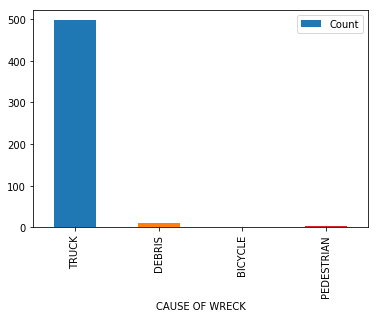

In [65]:
dframe.plot.bar(x='CAUSE OF WRECK', y='Count')